## 🏀 NBA Linear Regression Analysis: Predicting Field Goals from Points

# Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr 
from scipy import stats 
import matplotlib.pyplot as plt 
import seaborn as sn
from math import *

# 📁 2. Load the Dataset

In [2]:
data = pd.read_csv("nba_data_processed.csv")
data.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,23.0,TOR,38.0,11.0,23.3,3.9,8.1,0.482,...,0.689,2.0,4.6,6.6,1.0,0.6,0.7,1.2,2.1,10.2
1,Steven Adams,C,29.0,MEM,42.0,42.0,27.0,3.7,6.3,0.597,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,Bam Adebayo,C,25.0,MIA,57.0,57.0,35.0,8.4,15.7,0.536,...,0.800,2.6,7.2,9.8,3.2,1.2,0.8,2.5,2.8,21.2
3,Ochai Agbaji,SG,22.0,UTA,39.0,2.0,15.6,1.8,3.8,0.483,...,0.682,0.7,1.1,1.8,0.6,0.2,0.1,0.3,1.4,5.0
4,Santi Aldama,PF,22.0,MEM,56.0,18.0,22.0,3.3,7.0,0.474,...,0.729,1.0,3.6,4.6,1.2,0.7,0.7,0.7,1.9,9.4


# 🔢 3. Select Only Numerical Data

In [3]:
num_data = data.select_dtypes(include=['int64', 'float64'])
print(num_data)

      Age     G    GS    MP   FG   FGA    FG%   3P  3PA    3P%  ...    FT%  \
0    23.0  38.0  11.0  23.3  3.9   8.1  0.482  0.5  2.0  0.260  ...  0.689   
1    29.0  42.0  42.0  27.0  3.7   6.3  0.597  0.0  0.0  0.000  ...  0.364   
2    25.0  57.0  57.0  35.0  8.4  15.7  0.536  0.0  0.2  0.083  ...  0.800   
3    22.0  39.0   2.0  15.6  1.8   3.8  0.483  0.9  2.3  0.396  ...  0.682   
4    22.0  56.0  18.0  22.0  3.3   7.0  0.474  1.4  3.7  0.364  ...  0.729   
..    ...   ...   ...   ...  ...   ...    ...  ...  ...    ...  ...    ...   
644  24.0  20.0   1.0  10.3  1.2   2.5  0.469  0.2  0.7  0.286  ...  0.636   
645  34.0  49.0   9.0  15.5  2.1   3.8  0.562  0.1  0.6  0.161  ...  0.692   
646  24.0  54.0  54.0  35.3  8.5  19.8  0.429  2.2  6.6  0.327  ...  0.889   
647  30.0   3.0   0.0  15.7  2.7   4.0  0.667  0.0  0.0    NaN  ...  0.500   
648  25.0  59.0  59.0  29.4  4.0   6.5  0.617  0.0  0.0  0.000  ...  0.699   

     ORB  DRB   TRB   AST  STL  BLK  TOV   PF   PTS  
0    2.0 

🎯 We focus on numeric columns only, since linear regression works on numerical inputs.

# 🧹 4. Remove Duplicate Rows

In [4]:
print(f"Rows after removing duplicates: {len(num_data)}")
print(f"Duplicate rows: {num_data.duplicated().sum()}")

# Supprimer les lignes dupliquées
num_data = num_data.drop_duplicates()

print(f"Rows after removing duplicates: {len(data)}")

Rows after removing duplicates: 649
Duplicate rows: 24
Rows after removing duplicates: 649


🧼 To ensure data quality, we remove any duplicate rows.

# 🧼 5. Handle Missing Values

In [5]:
num_data = num_data.fillna(num_data.mean(numeric_only=True))
# (Re)afficher pour confirmation
print("\naprès suppression :",num_data.isnull().sum())


après suppression : Age     0
G       0
GS      0
MP      0
FG      0
FGA     0
FG%     0
3P      0
3PA     0
3P%     0
2P      0
2PA     0
2P%     0
eFG%    0
FT      0
FTA     0
FT%     0
ORB     0
DRB     0
TRB     0
AST     0
STL     0
BLK     0
TOV     0
PF      0
PTS     0
dtype: int64


#  📊 6. Summary Statistics (Mean, Min, Max)

In [6]:
MM = pd.DataFrame(num_data.mean(), columns=['mean'])
MM

,mean
Age,26.051282
G,34.756410
GS,16.195513
MP,19.438782
FG,3.222596
FGA,6.878045
FG%,0.467000
3P,0.991827
3PA,2.765224
3P%,0.330205


In [7]:
MM['max'] = num_data.max()
MM['min'] = num_data.min()
MM

,mean,max,min
Age,26.051282,42.0,19.0
G,34.756410,64.0,1.0
GS,16.195513,63.0,0.0
MP,19.438782,37.5,1.0
FG,3.222596,11.3,0.0
FGA,6.878045,22.6,0.0
FG%,0.467000,1.0,0.0
3P,0.991827,4.9,0.0
3PA,2.765224,11.4,0.0
3P%,0.330205,1.0,0.0


📈 We compute basic statistics (mean, max, min) for each numeric feature.

# 📈 7. Correlation Matrix

In [8]:
num_data.corr()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Age,1.000000,0.024648,0.079722,0.177994,0.094160,0.098991,0.005271,0.187756,0.169404,0.112063,...,0.108777,-0.025436,0.113441,0.077413,0.210182,0.119050,0.031676,0.109737,0.140330,0.108828
G,0.024648,1.000000,0.635639,0.608788,0.498225,0.492262,0.093239,0.358171,0.370792,0.060330,...,0.187189,0.331256,0.455167,0.447878,0.363708,0.322053,0.293097,0.445291,0.445793,0.491093
GS,0.079722,0.635639,1.000000,0.801791,0.734636,0.718975,0.110087,0.485785,0.499914,0.035552,...,0.176148,0.419901,0.640030,0.614992,0.577481,0.490674,0.391497,0.656357,0.572607,0.726950
MP,0.177994,0.608788,0.801791,1.000000,0.876971,0.886000,0.070637,0.690352,0.713655,0.118775,...,0.223288,0.403000,0.732752,0.680110,0.732807,0.691421,0.400615,0.775150,0.736479,0.876380
FG,0.094160,0.498225,0.734636,0.876971,1.000000,0.974903,0.168182,0.654459,0.674013,0.116883,...,0.201423,0.379593,0.725206,0.666457,0.725678,0.583382,0.383690,0.839313,0.611677,0.991059
FGA,0.098991,0.492262,0.718975,0.886000,0.974903,1.000000,0.014374,0.747588,0.785801,0.112000,...,0.239475,0.259448,0.653095,0.574729,0.752986,0.593441,0.290794,0.838178,0.573243,0.980670
FG%,0.005271,0.093239,0.110087,0.070637,0.168182,0.014374,1.000000,-0.153442,-0.226109,0.269103,...,-0.141264,0.377527,0.254640,0.310442,-0.008517,0.004891,0.266503,0.084593,0.217600,0.121758
3P,0.187756,0.358171,0.485785,0.690352,0.654459,0.747588,-0.153442,1.000000,0.975092,0.344112,...,0.311151,-0.127694,0.300132,0.187885,0.536450,0.463427,0.027002,0.511577,0.348111,0.703047
3PA,0.169404,0.370792,0.499914,0.713655,0.674013,0.785801,-0.226109,0.975092,1.000000,0.232609,...,0.307416,-0.121731,0.325579,0.208975,0.569259,0.480759,0.024248,0.549227,0.366417,0.721165
3P%,0.112063,0.060330,0.035552,0.118775,0.116883,0.112000,0.269103,0.344112,0.232609,1.000000,...,0.090751,-0.151548,0.004232,-0.042852,0.084312,0.076513,-0.077475,0.043628,0.024004,0.138925


📊 The correlation matrix shows how strongly numeric features are related. Important for feature selection and multicollinearity.

# 🔗 8. Pearson Correlation Between PTS and FG

In [9]:
pd.DataFrame(
    pearsonr(num_data['PTS'], num_data['FG']),
    index=['pearson_coeff', 'p-value'],
    columns=['test results']
)

,test results
pearson_coeff,0.991059
p-value,0.000000


📐 The Pearson coefficient tells us the strength of the linear relationship between Points and Field Goals.


# 🖼️ 9. Scatter Plot of PTS vs FG

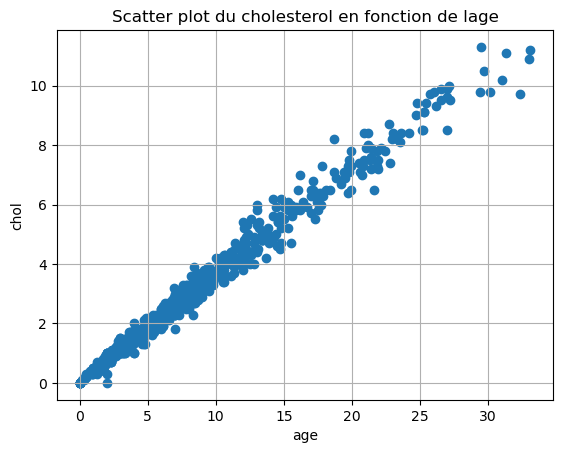

In [22]:
plt.scatter(num_data['PTS'], num_data['FG'])
plt.title("Scatter plot du cholesterol en fonction de lage")
plt.xlabel("age")
plt.ylabel("chol")
plt.grid(True)
plt.show()

# 📉 10. Manual Linear Regression with Scipy

In [11]:
slope_, intercept, r_value, p_value, std_err = stats.linregress(num_data['PTS'], num_data['FG'])

def Prediction(X):
    return slope_ * X + intercept

🔢 Using scipy.stats.linregress, we compute the slope and intercept of the best-fit line for FG ~ PTS.

# 📏 11. Create Fit Line for Visualization

In [12]:
fitline = Prediction(num_data['PTS'])

# 🤖 12. Linear Regression with scikit-learn

In [21]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Prepare X and y
X = num_data[['PTS']]
y = num_data['FG']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
mse_value = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse_value)
print("RMSE:", rmse)


R² Score: 0.9775835591270183
MAE: 0.2269052996506199
MSE: 0.11037166114111163
RMSE: 0.3322223068084255


🧠 Train/test split and linear regression modeling using scikit-learn. We evaluate using R², MAE, MSE, and RMSE.

# 📉 13. Test Data: Prediction vs Actual Plot

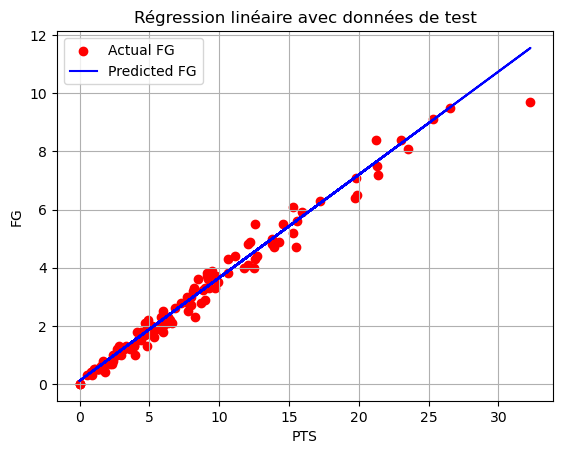

In [14]:

# Visualisation with test data
plt.scatter(X_test, y_test, c='red', label='Actual FG')
plt.plot(X_test, y_pred, c='blue', label='Predicted FG')
plt.title("Régression linéaire avec données de test")
plt.xlabel("PTS")
plt.ylabel("FG")
plt.legend()
plt.grid(True)
plt.show()


# 📈 14. Full Dataset Regression Line Visualization

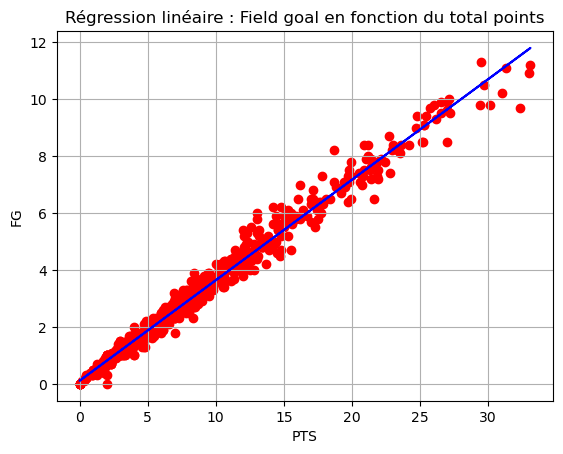

In [16]:
plt.scatter(num_data['PTS'], num_data['FG'], c='red')
plt.plot(num_data['PTS'], fitline, c='blue')
plt.title("Régression linéaire : Field goal en fonction du total points")
plt.xlabel("PTS")
plt.ylabel("FG")
plt.grid(True)
plt.show()

# 🧪 15. Evaluate Manual Linear Regression

In [23]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# True values
y_true = num_data['FG']

# Predicted values
y_pred = fitline

# Metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

# Display results
print("Manual Model Evaluation:")
print("R² Score:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


Manual Model Evaluation:
R² Score: 0.982198167136263
MAE: 0.22557842791351915
MSE: 0.10315468283865484
RMSE: 0.32117702725857405


🧠 We manually evaluate our Scipy regression results using standard metrics, confirming model accuracy.